In [2]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
print(f'{len(os.listdir("../data/depth_pcd"))} files')

815 files


In [26]:
idx = 300

lidar_pcd_path = f'../data/lidar_pcd/lidar_pcd_{idx:05d}.npy'
depth_pcd_path = f'../data/depth_pcd/depth_pcd_{idx:05d}.npy'
rgb_img_path = f'../data/rgb_img/rgb_img_{idx:05d}.jpg'
depth_img_path = f'../data/depth_img/depth_img_{idx:05d}.jpg'

lidar_pcd = np.load(lidar_pcd_path)
depth_pcd = np.load(depth_pcd_path)
rgb_img = cv2.imread(rgb_img_path, cv2.IMREAD_COLOR)
depth_img = cv2.imread(depth_img_path, cv2.IMREAD_GRAYSCALE)

In [27]:
print(f'pointcloud : lidar shape : {lidar_pcd.shape}')
print(f'pointcloud : depth camera shape : {depth_pcd.shape}')
print(f'image : rgb : {rgb_img.shape}')
print(f'image : depth : {depth_img.shape}')

pointcloud : lidar shape : (600, 3)
pointcloud : depth camera shape : (201680, 3)
image : rgb : (480, 640, 3)
image : depth : (400, 640)


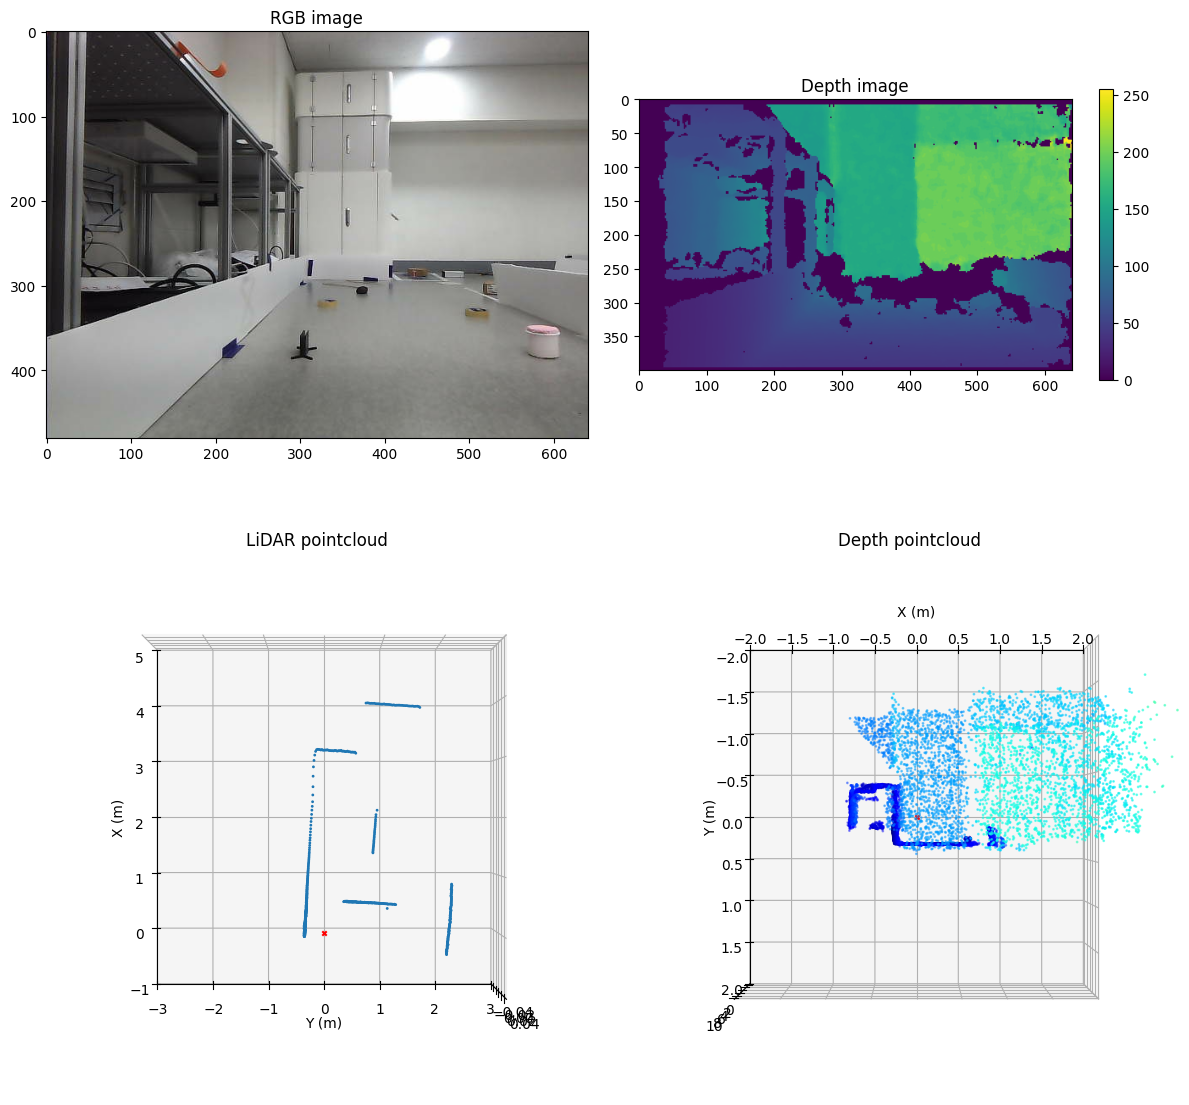

In [51]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2)

ax_rgb_img = fig.add_subplot(gs[0, 0])
ax_rgb_img.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
ax_rgb_img.set_title('RGB image')

ax_depth_img = fig.add_subplot(gs[0, 1])
im = ax_depth_img.imshow(depth_img)
ax_depth_img.set_title('Depth image')
fig.colorbar(im, shrink=0.5)

ax_lidar_pcd = fig.add_subplot(gs[1, 0], projection='3d')
ax_lidar_pcd.scatter(lidar_pcd[:,0], lidar_pcd[:,1], lidar_pcd[:,2], s=1, marker='o')
ax_lidar_pcd.scatter(0, 0, 0, s=10, c='r', marker='x')
ax_lidar_pcd.set_xlim(-1, 5); ax_lidar_pcd.set_xlabel('X (m)')
ax_lidar_pcd.set_ylim(-3, 3); ax_lidar_pcd.set_ylabel('Y (m)')
ax_lidar_pcd.set_ylim(ax_lidar_pcd.get_ylim()[::-1])
ax_lidar_pcd.view_init(elev=90., azim=-180)
ax_lidar_pcd.set_title('LiDAR pointcloud')

ax_depth_pcd = fig.add_subplot(gs[1, 1], projection='3d')
sample_depth_pcd = depth_pcd[np.random.randint(0, depth_pcd.shape[0], (10_000,)),:]
ax_depth_pcd.scatter(sample_depth_pcd[:,0], sample_depth_pcd[:,1], sample_depth_pcd[:,2], c=sample_depth_pcd[:,2], cmap='jet', s=1, marker='o')
ax_depth_pcd.scatter(0, 0, 0, s=10, c='r', marker='x')
ax_depth_pcd.set_xlim(-2, 2); ax_depth_pcd.set_xlabel('X (m)')
ax_depth_pcd.set_xlim(ax_depth_pcd.get_xlim()[::-1])
ax_depth_pcd.set_ylim(-2, 2); ax_depth_pcd.set_ylabel('Y (m)')
ax_depth_pcd.view_init(elev=90, azim=90)
ax_depth_pcd.set_title('Depth pointcloud')

plt.tight_layout()
plt.show()